In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#读数据

data_path = r".\MHcolors.csv"
data = pd.read_csv(data_path)
# with open(data_path, 'r') as file:
#     lines = file.readlines()
    
# data = {}
# current_color = None
# current_value = []
# # 解析每一行数据
# for line in lines:
#     line_data = line.strip().split('\t')  # 按制表符分割每一行数据
#     for item in line_data:
#         try:
#             value = float(item)
#             current_value.append(value)
#         except ValueError:
#             current_color = item
#             data[current_color] = current_value
data

,blue,green,red,hue,sat,value,HLS_H,HLS_L,HLS_S,label
0,32.951236,0.249957,16.044145,138.903723,252.887508,33.802348,138.883764,17.191772,250.955076,64.8
1,47.690706,0.479892,9.438726,128.186093,254.063791,47.691074,128.178328,24.016012,253.176518,64.8
2,52.612552,0.466293,7.129466,124.455487,254.042395,52.612552,124.449122,26.526178,253.128092,64.8
3,54.166341,0.258197,6.721217,123.811365,253.954623,54.166341,123.805234,27.408731,252.964003,64.8
4,92.517551,5.392348,0.784919,119.062532,254.204383,92.517551,119.053601,46.478149,253.441675,64.8
...,...,...,...,...,...,...,...,...,...,...
459,174.672190,108.448678,23.381579,103.082281,220.672190,174.672190,103.072419,99.028578,195.116369,99.8
460,178.635146,102.614578,14.431807,103.813358,234.164283,178.635146,103.805276,96.540571,217.394315,99.8
461,181.909040,94.368501,8.601112,105.037635,242.669548,181.909040,105.035498,95.284984,232.275471,99.8
462,182.535119,97.511441,11.099666,104.810353,239.307681,182.535119,104.809318,96.843469,226.213836,99.8


In [3]:
select_label = ['blue','green', 'hue', 'value','label']
data = data[select_label]

In [4]:
data.describe()

,blue,green,hue,value,label
count,464.000000,464.000000,464.000000,464.000000,464.000000
mean,135.322249,38.115122,114.188256,135.325428,80.331034
std,54.519417,34.664283,6.233224,54.513523,10.192195
min,32.951236,0.094940,103.082281,33.802348,64.800000
25%,79.067785,1.533281,109.187036,79.067785,70.200000
50%,151.382331,34.350612,113.647359,151.382331,80.250000
75%,182.653177,65.770831,119.642365,182.653177,89.200000
max,238.810860,116.573593,138.903723,238.810860,99.800000


In [5]:
#2、查看是否缺失数据
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   blue    464 non-null    float64
 1   green   464 non-null    float64
 2   hue     464 non-null    float64
 3   value   464 non-null    float64
 4   label   464 non-null    float64
dtypes: float64(5)
memory usage: 18.2 KB


Text(0.5, 0, 'Continuous Variable')

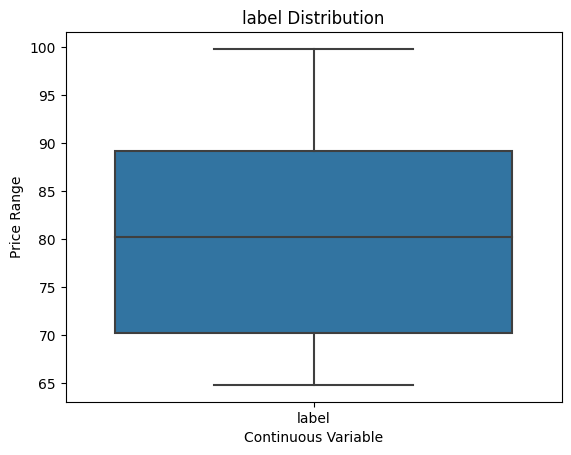

In [6]:
#3、数据可视化，画出散点图
#先查看目标数据的分布
import seaborn as sns
outliers = ['label']

sns.boxplot(data = data[outliers])
plt.title("label Distribution")
plt.ylabel("Price Range")
plt.xlabel("Continuous Variable")

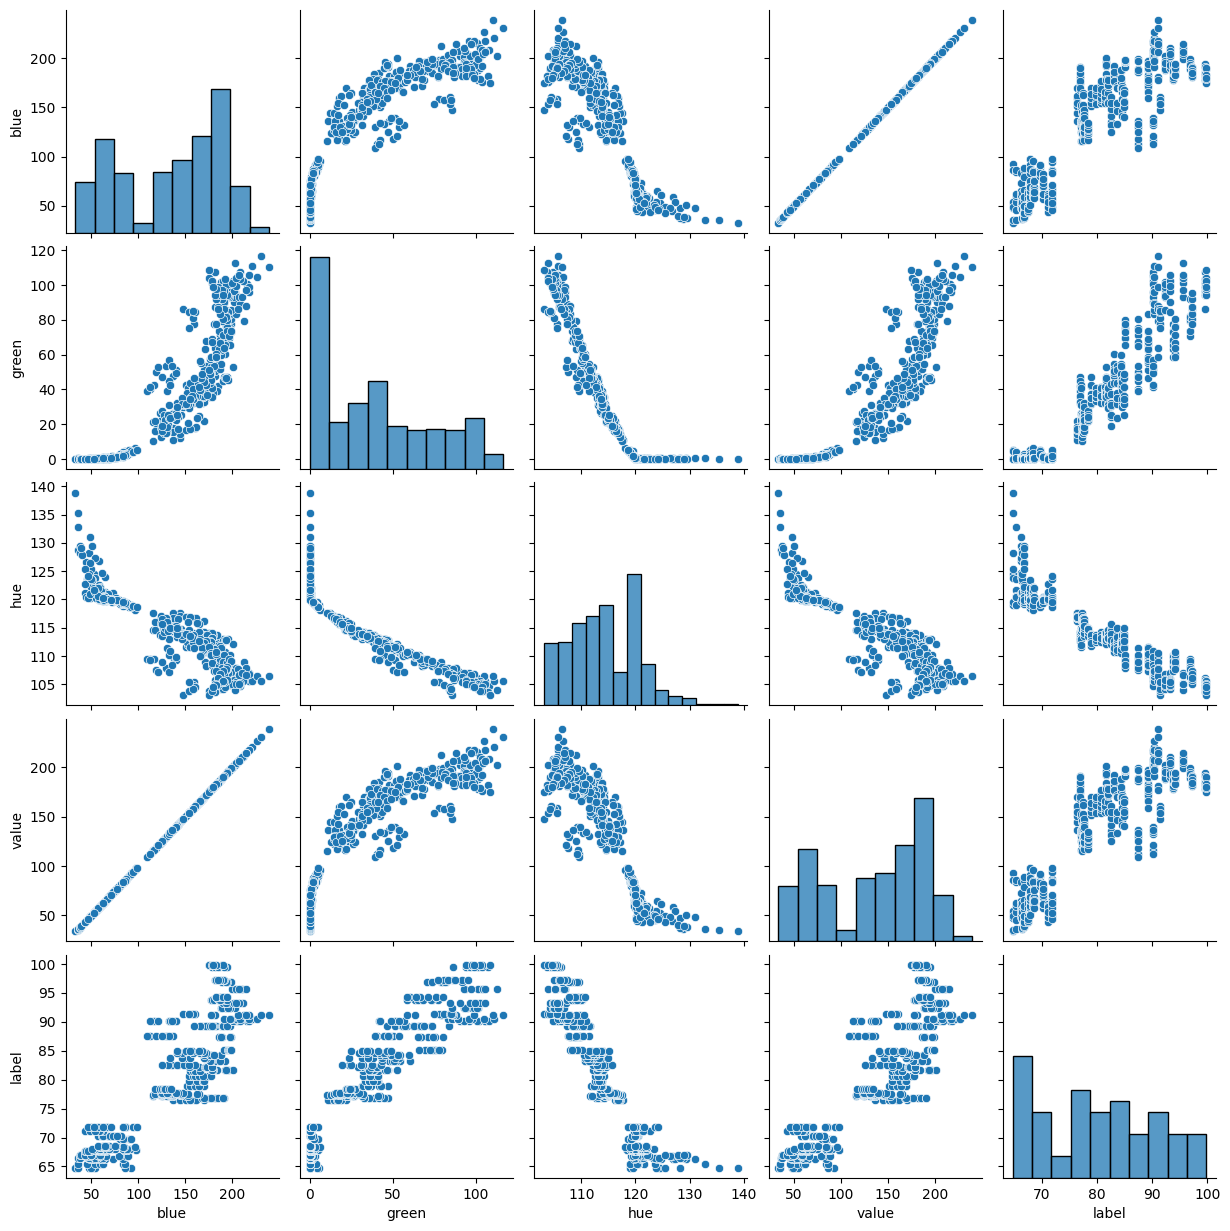

In [7]:
ax=sns.pairplot(data)

In [8]:
#数据分割
np.random.seed(0)
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3, random_state = 100)
train.shape

(324, 5)

In [9]:
# #对数据进行特征工程
# from sklearn.preprocessing import StandardScaler, Normalizer
# std = Normalizer()
# train = std.fit_transform(train)
# train

In [10]:
# test = std.transform(test)
# test

<AxesSubplot:>

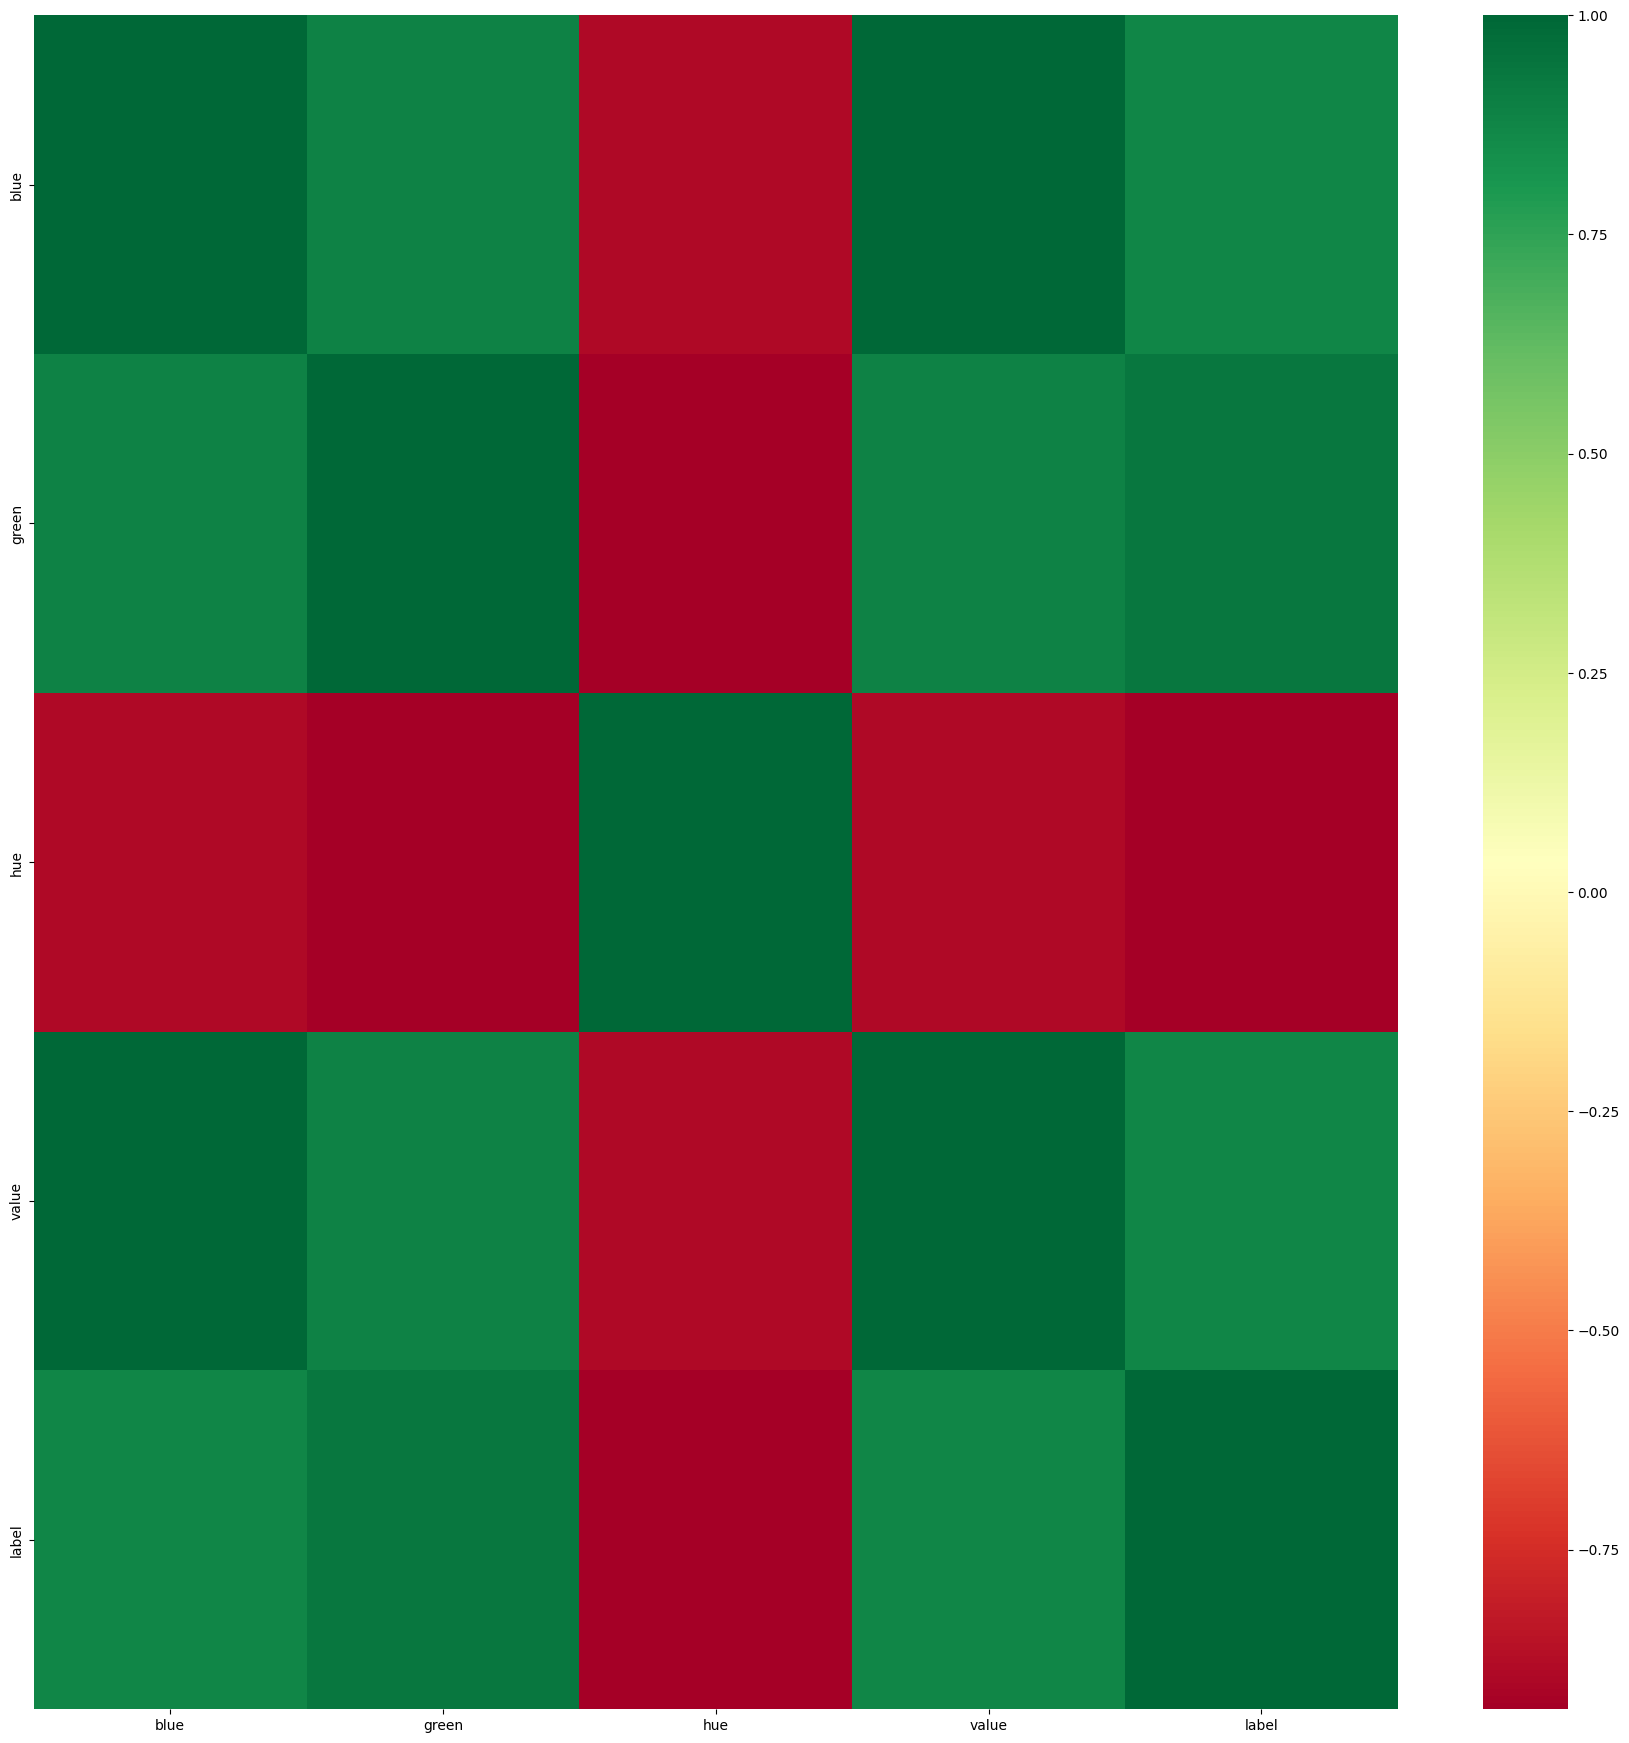

In [11]:
#画出热力图
plt.figure(figsize = (22, 22))
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
sns.heatmap(train_df.corr(), cmap = "RdYlGn", xticklabels=train_df.columns,yticklabels=train_df.columns)

In [12]:
#制作x，y
y_train = train.iloc[:, -1]
X_train = train.iloc[:, :-1]
y_test = test.iloc[:, -1]
X_test = test.iloc[:, :-1]
# y_train = train[:, -1]
# X_train = train[:, :-4]
# y_test = test[:, -1]
# X_test = test[:, :-4]
X_test

,blue,green,hue,value
304,152.364361,31.624710,113.918125,152.364361
426,202.242085,112.659666,103.894537,202.242085
356,215.569862,100.826637,106.117665,215.569862
241,154.560579,32.852354,113.735335,154.560579
96,76.174797,0.782822,120.171356,76.174797
...,...,...,...,...
171,150.339800,42.569914,111.578426,150.339800
332,136.549205,47.665368,109.784564,136.549205
45,38.879372,0.235760,129.021645,38.913455
434,189.096727,91.848793,106.316469,189.096727


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pre = model.predict(X_test)
y_pre

array([79.99669021, 98.98576012, 95.89200499, 80.32962449, 69.99761563,
       87.4023157 , 86.23094631, 70.11580397, 66.12336144, 78.33959797,
       75.27624243, 69.8462029 , 84.35252523, 74.53169734, 80.97108866,
       77.16337477, 80.06603504, 91.57885732, 69.96163876, 91.43780833,
       81.95396007, 81.00946679, 68.96157958, 92.69913653, 72.11591271,
       96.23049604, 76.2993117 , 77.74277661, 93.95328953, 96.55659671,
       77.61948601, 93.88526354, 63.91298308, 80.96777703, 69.17746269,
       83.31425212, 82.70986357, 78.03148846, 97.62875763, 89.72405693,
       80.77255561, 69.85097471, 85.41344424, 70.17990513, 95.41927907,
       59.09332751, 95.69181159, 84.74019191, 69.30255041, 94.82917479,
       81.08092888, 70.26977072, 95.44109836, 70.2150779 , 70.49256347,
       96.86009781, 93.13170747, 97.39073029, 71.29038169, 92.72160026,
       68.91487407, 69.89607701, 76.89973119, 72.20450658, 95.02515119,
       92.46276835, 69.47675483, 94.82388531, 79.67084103, 66.68

In [15]:
accuracy = model.score(X_test, y_test)
accuracy

0.9132675754373826

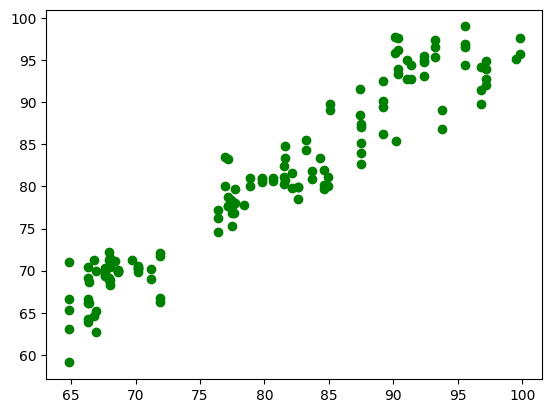

0.9132675754373826


In [19]:
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred , color='green')
plt.show()
print(accuracy)


In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("均方误差（MSE）: {:.2f}".format(mse))
print("决定系数（R^2）: {:.2f}".format(r2))

均方误差（MSE）: 9.31
决定系数（R^2）: 0.91


In [18]:
intercept = model.intercept_ 
coefficients = model.coef_ 
print("截距:", intercept) 
print("系数:", coefficients)

截距: 165.63801423725306
系数: [-12.90577698   0.12599087  -0.8056352   12.9198925 ]
